In [337]:
import numpy as np
np.linspace(2.85,3.45,7)

array([2.85, 2.95, 3.05, 3.15, 3.25, 3.35, 3.45])

In [338]:
from Functions import *
X = np.linspace(0,10,100).reshape(-1,1)
Y = X
data = np.meshgrid(X,Y)
param_dict = {"aspect":2,
              "fontsize":2,
              "cbar_label":"label"}

In [339]:
param_dict={"xticks":[1,2,3,4,5]}
xticks = np.array(param_dict["xticks"])
xmin=2
xmax=4
xticks_mask = np.where((xticks<xmax) & (xticks>xmin))
xticks[xticks_mask]


array([3])

In [340]:
def Load_uncoupled_data(filename_uncoupled, wavl_arr=[]):
    beta_uncoupled_arr = []
    with open(filename_uncoupled,'r') as f:
        data_uncoupled = f.readlines()
        for line in data_uncoupled[1:]:
            line = np.float64(line.split(","))
            if line[0] < np.min(wavl_arr) or line[0] > np.max(wavl_arr):
                continue
            beta_uncoupled_arr.append(line)
    beta_uncoupled_arr = np.array(beta_uncoupled_arr)
    return beta_uncoupled_arr


In [341]:
from scipy.interpolate import CubicSpline
def Interpolation(self,x,y,x_intp,num_of_pts=100):
    cs = CubicSpline(x, y, bc_type='natural')  # bc_type 可选 'natural', 'clamped', 'periodic' 等
    y_intp = cs(x_intp)
    return y_intp

def Polynomial_fit(x, y_arr, x_fit, order = 1, num_of_fit_pts  = 100):
        num_of_columns  = np.shape(y_arr)[1]
        coeffi_array    = np.zeros((order+1,num_of_columns))
        y_fit_arr       = np.zeros((num_of_fit_pts,num_of_columns))
        for idx in range(num_of_columns):
            y = y_arr[:,idx]
            coefficients = np.polyfit(x, y, order)
            coeffi_array[:,idx] = coefficients
            y_fit = np.polyval(coefficients, x_fit)
            y_fit_arr[:,idx] = y_fit
        return coeffi_array, y_fit_arr

num_of_pts  = 1000
wavl_arr    = np.linspace(1400,1700,30)*1e-3
fre_arr     = 3*1e8 / (wavl_arr)
wavl_arr_intp    =  np.linspace(1400,1700,num_of_pts)*1e-3
fre_arr_intp     = 3*1e8 / (wavl_arr_intp)
filename_uncoupled = "./results/beta/Sheet 1-Table 1.txt"
beta_uncoupled_arr = Load_uncoupled_data(filename_uncoupled, wavl_arr)
beta_uncoupled_arr = beta_uncoupled_arr

beta_uncoupled_arr

array([[1.41000000e+00, 0.00000000e+00, 0.00000000e+00, 6.62923008e+03],
       [1.42000000e+00, 0.00000000e+00, 0.00000000e+00, 6.57847452e+03],
       [1.43000000e+00, 0.00000000e+00, 0.00000000e+00, 6.52849976e+03],
       [1.44000000e+00, 0.00000000e+00, 0.00000000e+00, 6.47928810e+03],
       [1.45000000e+00, 0.00000000e+00, 0.00000000e+00, 6.43082237e+03],
       [1.46000000e+00, 0.00000000e+00, 0.00000000e+00, 6.38307645e+03],
       [1.47000000e+00, 0.00000000e+00, 0.00000000e+00, 6.33603832e+03],
       [1.48000000e+00, 0.00000000e+00, 0.00000000e+00, 6.28966317e+03],
       [1.49000000e+00, 0.00000000e+00, 0.00000000e+00, 6.24397164e+03],
       [1.50000000e+00, 0.00000000e+00, 0.00000000e+00, 6.19894887e+03],
       [1.51000000e+00, 0.00000000e+00, 0.00000000e+00, 6.15457416e+03],
       [1.52000000e+00, 0.00000000e+00, 0.00000000e+00, 6.11083400e+03],
       [1.53000000e+00, 0.00000000e+00, 0.00000000e+00, 6.06771773e+03],
       [1.54000000e+00, 0.00000000e+00, 0.00000000e

In [342]:
coeffi_array, beta_uncoupled_arr_intp = Polynomial_fit(fre_arr,
                                                beta_uncoupled_arr[:,3].reshape(-1,1),
                                                fre_arr_intp,
                                                5, num_of_pts)
coeffi_array


array([[ 2.20630528e-37],
       [-2.14979823e-28],
       [ 8.36687567e-20],
       [-1.62512236e-11],
       [ 1.60665574e-03],
       [-6.10970024e+04]])

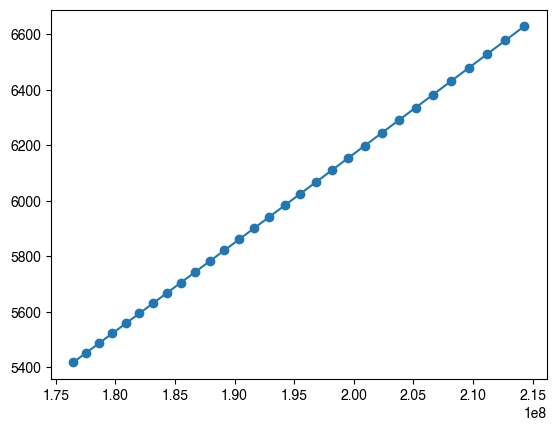

In [343]:
plt.scatter(fre_arr,beta_uncoupled_arr[:,3])
plt.plot(fre_arr_intp,beta_uncoupled_arr_intp)

In [344]:
np.shape(beta_uncoupled_arr)

(30, 4)

In [345]:
def Calculate_dispersion_D(Beta,wavl_arr_):

    wavl_arr    = wavl_arr_ * 1e-6          #unit: m
    fre_arr     = 3*10**8 / (wavl_arr)      #unit: Hz
    Beta_1      = First_derivative_central_diff(Beta, fre_arr)
    Beta_1      = Beta_1 *1e12 * 1e3        # unit: ps/km
    D           = First_derivative_central_diff(Beta_1, wavl_arr[1:-1])
    D           = D * 1e-9                          # unit: ps/km/nm
    return D, Beta_1

def First_derivative_central_diff(y,x):
    # 计算差分
    dy = np.diff(y)  # y[i+1] - y[i]
    dx = np.diff(x)  # x[i+1] - x[i]
    # 中心差分
    dy_central = (y[2:] - y[:-2])  # y[i+1] - y[i-1]
    dx_central = (x[2:] - x[:-2])  # x[i+1] - x[i-1]
    # 计算导数
    derivative = dy_central / dx_central
    return derivative

D_WG1, Beta_1_WG1 = Calculate_dispersion_D(beta_uncoupled_arr_intp.reshape((num_of_pts,),), wavl_arr_intp)

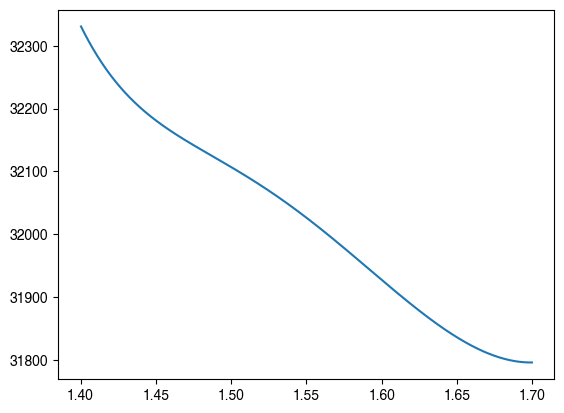

In [346]:
plt.plot(wavl_arr_intp[1:-1],Beta_1_WG1)

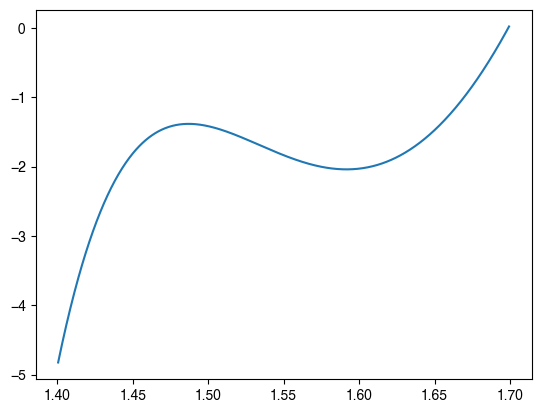

In [347]:
plt.plot(wavl_arr_intp[2:-2],D_WG1)

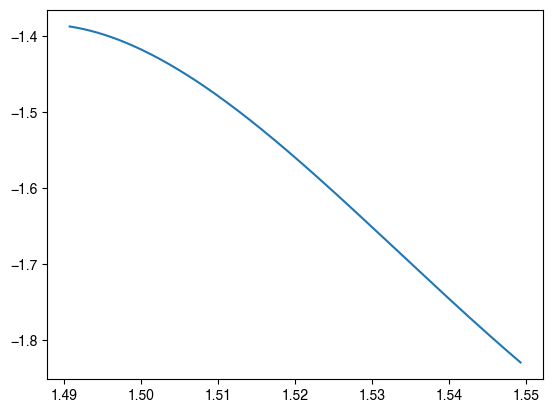

In [348]:
plt.plot(wavl_arr_intp[2+300:-2-500],D_WG1[300:-500])